### Task 2: (Level Beginner)

### Prediction using Unsupervised ML

Unsupervised learning is commonly used for finding meaningful patterns and groupings inherent in data, extracting generative features, and exploratory purposes.It forms a group of clusters based on the similarities,variations,shapes,colors,sizes etc.

##### Let's import the required libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#Load or read the data
ir=pd.read_csv('Iris.csv')
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
ir.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
#Get the info
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
#Get the shape
print('No of Records: ',ir.shape[0])
print('No of variables: ',ir.shape[1])

No of Records:  150
No of variables:  6


In [32]:
#Get the statistical and description of the data
ir.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [33]:
#Drop the i'd column as it does'nt require 
ir.drop(columns=['Id'],axis=1,inplace=True)

In [34]:
ir.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [35]:
#Check the realtionship between the variables with the help of scatter plot
def plot_scatter(data,x,y,hue='Species'):
    plt.figure(figsize=(9,7))
    plt.style.use('seaborn-whitegrid')
    g=sns.scatterplot(data[x],data[y],hue=hue,data=data,palette='dark')
    g.set_title('Relationship between the '+x + ' vs '+ y)
    plt.show()
    return g

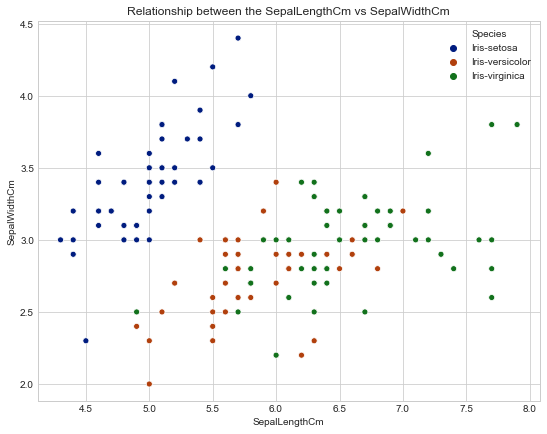

In [36]:
plot_scatter(ir,'SepalLengthCm','SepalWidthCm')

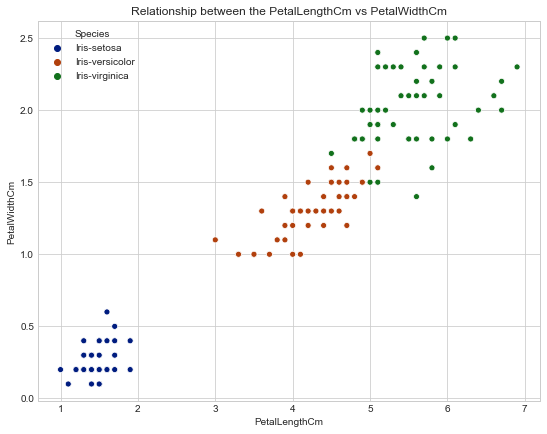

In [37]:
plot_scatter(ir,'PetalLengthCm','PetalWidthCm')

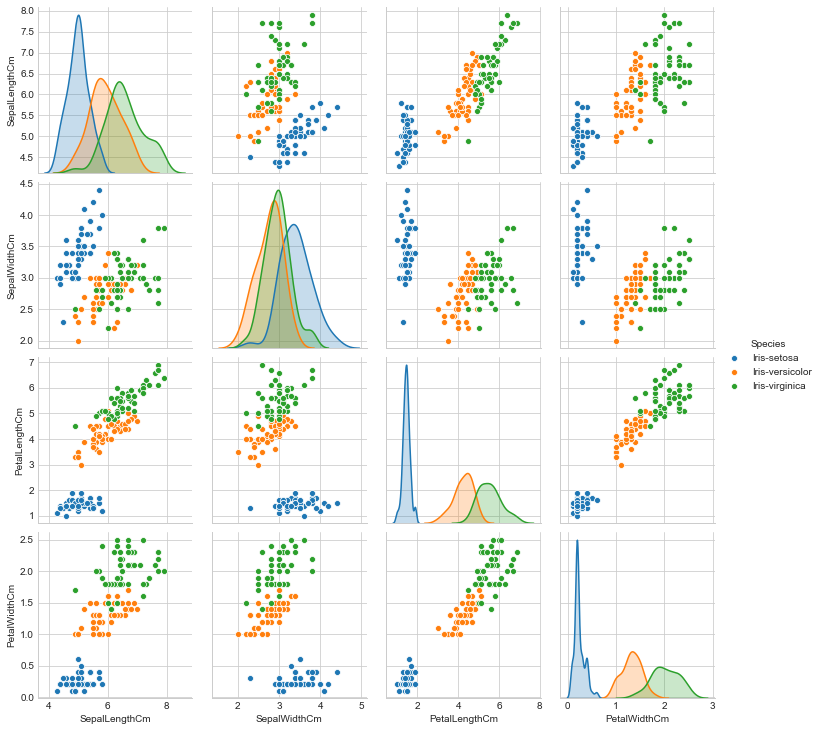

In [71]:
#Check the relationship between the variables with the help of pairplot
sns.pairplot(ir,hue='Species')

In [60]:
x=ir.drop('Species',1).values
y=ir['Species']

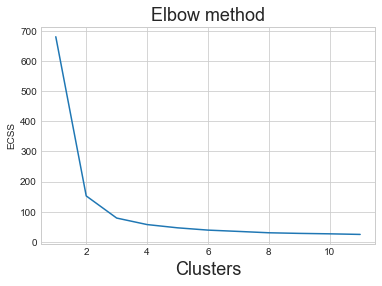

In [61]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,12):
    kmeans=KMeans(init='k-means++',n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,12),wcss)
plt.title('Elbow method',fontsize=18)
plt.xlabel('Clusters',fontsize=18)
plt.ylabel('ECSS')
plt.show()

As we can see that, why it is called an 'Elbow method' from the above graph, the optimum clusters is where the elbow occurs.This is when the within the cluster sum of squares(WCSS) doesn't decresing significantly with every iteration

In [62]:
#The optimim cluster is 3 so we need to pass the number of clusters is 3 to our model
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans

KMeans(n_clusters=3, random_state=0)

In [63]:
#Fit the model with the given data
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

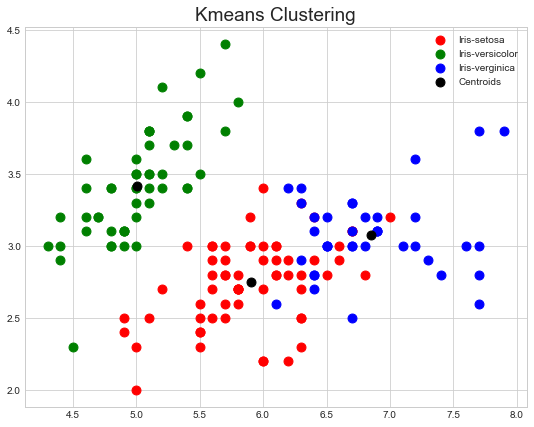

In [67]:
#Visulaize the clusters
plt.figure(figsize=(9,7))
plt.scatter(x[y_kmeans==0, 0],x[y_kmeans==0, 1],s=80,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0],x[y_kmeans==1, 1],s=80,c='green',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2, 0],x[y_kmeans==2, 1],s=80,c='b',label='Iris-verginica')


#plot the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c='black',label='Centroids')
plt.title('Kmeans Clustering',fontsize=19)
plt.legend()